# 6.7 Creating Data Dashboards

## Global Terrorism Dataset & World Bank Economic Indicators

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries
2. Import & format data
- 2.1 Global terrorism dataset
- 2.2 GDP per capita dataset
- 2.3 Inflation dataset
- 2.4 Unemployment dataset
3. Clean & wrangle data
- 3.1 Global terrorism dataset
 - 3.1.1 Wrangled terrorism dataset
 - 3.1.2 Total incidents by country
- 3.2 GDP per capita dataset
- 3.3 Inflation dataset
- 3.4 Unemployment dataset
4. Merge datasets
5. Exploratory data analysis
- 5.1 Pair plot
- 5.2 Correlation matrix heatmap
6. Cluster data
- 6.1 Standardize data
- 6.2 Elbow technique
- 6.3 k-means algorithm
- 6.4 Visualize clusters
- 6.5 Calculate statistics
7. Export data

Upon detailed examination of the GDELT conflict dataset used in previous exercises, I determined that the data is unreliable. As the years go on, the total incidents (particularly in the United States) quickly rise to unbelievably high levels. For example, according to the dataset, in 2017 there were nearly *15,000* violent incidents involving tanks and artillery **on US soil!** In 2020, there were *92* incidents involving the use of military force in **Antarctica!** Either the entire method of data collection (an automated algorithm that reads media reports) is flawed and producing unreliable results, or the analyst who extracted the data from the GDELT database made a mistake in how they calculated the "SumEvents" column. Either way, no accurate and meaningful analysis can come from this data. Instead, I have decided to utilize information from the Global Terrorism Database in conjuction with three economic indicators as provided by the World Bank: GDP per capita (in current international dollars, weighted to account for different purchasing powers), annual percent inflation, and percent of the workforce unemployed.

# 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

# 2. Import & format data

### 2.1 Global terrorism dataset

##### This dataset was pre-prepared in Excel prior to importation. The full global terrorism dataset was too large to import and so unnecessary columns were excised to save space. Additionally, the dataset used the names of countries as they existed at the time of each event. I updated the names to be consistent with current political borders as determined by the coordinates provided. In cases where no coordinates were provided, I left the names as-is.

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
terror=pd.read_csv(os.path.join(path, '02 Data','Intermediate Data', 'globalterrorismdb_0221dist_prepared.csv'))
# Disable column limits
pd.options.display.max_columns = None
terror

,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt
0,1970,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination
1,1970,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping)
2,1970,Philippines,Southeast Asia,15.478598,120.599741,Assassination
3,1970,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion
4,1970,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack
...,...,...,...,...,...,...
201178,2019,Iraq,Middle East & North Africa,33.303567,44.371771,Bombing/Explosion
201179,2019,Sudan,Sub-Saharan Africa,13.440886,22.441728,Unknown
201180,2019,Sudan,Sub-Saharan Africa,13.440886,22.441728,Armed Assault
201181,2019,India,South Asia,33.812790,74.097730,Bombing/Explosion


### 2.2 GDP per capita dataset

In [3]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
gdp=pd.read_csv(os.path.join(path, '02 Data','Intermediate Data', 'gdp_per_capita_ppp_int_dollars_python.csv'))
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23293.037410,25004.171910,25643.083680,26515.890260,27695.544860,27690.091330,27541.549160,29223.236880,29508.862270,29716.834310,32026.972740,31064.355650,29847.928350,30356.045270,33050.903380,34051.492800,35168.561470,36619.588030,37247.980500,33553.882000,32625.492690,34324.799360,33567.550020,36829.032770,36779.429430,37311.750320,37585.025080,38897.122670,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.584807,1865.700248,1821.675395,1811.827790,1835.494768,1906.160366,1994.719301,2051.068201,2058.714699,2092.765062,2157.594074,2227.874824,2291.843098,2348.955087,2482.610778,2648.821823,2834.661339,3025.289356,3140.368146,3107.005073,3214.969758,3320.493308,3235.163359,3362.868809,3499.132878,3527.164192,3620.921502,3697.459305,3786.357310,3836.571430,3677.111255
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,877.014268,927.857548,925.441429,1023.051749,1077.761540,1228.703863,1272.572975,1519.692923,1710.575411,1699.488110,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1730.711520,1763.354595,1801.291617,1776.373521,1763.906972,1790.671127,1858.693020,1921.690399,1960.061542,1965.690117,2027.399370,2123.119562,2298.886007,2405.563875,2596.234097,2757.792101,2912.195462,3066.933985,3230.719084,3359.362655,3532.142986,3675.392441,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4240.534782
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3279.222122,3311.776452,3086.565116,2325.187270,2330.242812,2649.361121,2966.383322,3136.516286,3215.105619,3226.128142,3289.409549,3389.196967,3785.150322,3838.795052,4225.467927,4837.709827,5362.019843,6050.610555,6607.291634,6470.675244,6587.986939,6710.750623,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6539.179545,6865.417898,7230.205130,7780.594464,8039.207976,8383.397311,8649.449499,9357.135136,10007.689230,10436.168850,11013.397080,11797.119320,11383.404730
262,"Yemen, Rep.",YEM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Drop unnecessary columns
gdp=gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
gdp.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23293.037410,25004.171910,25643.083680,26515.890260,27695.544860,27690.091330,27541.549160,29223.236880,29508.862270,29716.834310,32026.972740,31064.355650,29847.928350,30356.045270,33050.903380,34051.492800,35168.561470,36619.588030,37247.980500,33553.882000,32625.492690,34324.799360,33567.550020,36829.032770,36779.429430,37311.750320,37585.025080,38897.122670,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.584807,1865.700248,1821.675395,1811.827790,1835.494768,1906.160366,1994.719301,2051.068201,2058.714699,2092.765062,2157.594074,2227.874824,2291.843098,2348.955087,2482.610778,2648.821823,2834.661339,3025.289356,3140.368146,3107.005073,3214.969758,3320.493308,3235.163359,3362.868809,3499.132878,3527.164192,3620.921502,3697.459305,3786.357310,3836.571430,3677.111255
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,877.014268,927.857548,925.441429,1023.051749,1077.761540,1228.703863,1272.572975,1519.692923,1710.575411,1699.488110,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1730.711520,1763.354595,1801.291617,1776.373521,1763.906972,1790.671127,1858.693020,1921.690399,1960.061542,1965.690117,2027.399370,2123.119562,2298.886007,2405.563875,2596.234097,2757.792101,2912.195462,3066.933985,3230.719084,3359.362655,3532.142986,3675.392441,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4240.534782
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3279.222122,3311.776452,3086.565116,2325.187270,2330.242812,2649.361121,2966.383322,3136.516286,3215.105619,3226.128142,3289.409549,3389.196967,3785.150322,3838.795052,4225.467927,4837.709827,5362.019843,6050.610555,6607.291634,6470.675244,6587.986939,6710.750623,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680


In [5]:
# Create list of countries
countrylist_gdp=gdp[['Country Name']]
countrylist_gdp

,Country Name
0,Aruba
1,Africa Eastern and Southern
2,Afghanistan
3,Africa Western and Central
4,Angola
...,...
261,Kosovo
262,"Yemen, Rep."
263,South Africa
264,Zambia


In [6]:
# Transpose dataframe
gdp_t=gdp.transpose().reset_index()
gdp_t

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czech Republic,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Gibraltar,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Not classified,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Monaco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high inc...,Montenegro,Mongolia,Northern Mariana Islands,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,Nauru,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD coun

In [7]:
# Remove everything except the year column
gdp0=gdp_t.iloc[1:, 0]
gdp0=pd.DataFrame(gdp0)
gdp0=gdp0.rename(columns = {'index':'Year'})
gdp0

,Year
1,1960
2,1961
3,1962
4,1963
5,1964
...,...
57,2016
58,2017
59,2018
60,2019


In [8]:
# Add name of first country on list
gdp0['Country Name']=countrylist_gdp.iloc[0,0]
gdp0

,Year,Country Name
1,1960,Aruba
2,1961,Aruba
3,1962,Aruba
4,1963,Aruba
5,1964,Aruba
...,...,...
57,2016,Aruba
58,2017,Aruba
59,2018,Aruba
60,2019,Aruba


In [9]:
# Add GDP column for first country on list
gdp0['GDP per capita']=gdp_t[0]
gdp0

,Year,Country Name,GDP per capita
1,1960,Aruba,NaN
2,1961,Aruba,NaN
3,1962,Aruba,NaN
4,1963,Aruba,NaN
5,1964,Aruba,NaN
...,...,...,...
57,2016,Aruba,37585.02508
58,2017,Aruba,38897.12267
59,2018,Aruba,NaN
60,2019,Aruba,NaN


In [10]:
# Repeat process for remaining countries and append into a single dataframe
gdp_format=pd.DataFrame()
for i in range(0,countrylist_gdp.index.stop):
    gdp_tem=gdp_t.iloc[1:,0]
    gdp_tem=pd.DataFrame(gdp_tem)
    gdp_tem=gdp_tem.rename(columns={'index':'Year'})
    gdp_tem['Country Name']=countrylist_gdp.iloc[i,0]
    gdp_tem['GDP per capita']=gdp_t[i]
        
    gdp_format=gdp_format.append(gdp_tem)
    
gdp_format.reset_index(drop=True, inplace=True)
gdp_format

,Year,Country Name,GDP per capita
0,1960,Aruba,NaN
1,1961,Aruba,NaN
2,1962,Aruba,NaN
3,1963,Aruba,NaN
4,1964,Aruba,NaN
...,...,...,...
16221,2016,Zimbabwe,2806.469032
16222,2017,Zimbabwe,3795.642431
16223,2018,Zimbabwe,4017.221716
16224,2019,Zimbabwe,3783.547898


### 2.3 Inflation dataset

In [11]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
inf=pd.read_csv(os.path.join(path, '02 Data','Intermediate Data', 'inflation_annual_percent_CPI_python.csv'))
inf

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216477,14.238055,12.526893,15.069850,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495259,7.819865,8.601485,5.840354,8.763752,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.746949,5.370290,5.250171,6.594604,6.399343,4.720811,3.923372,4.978097
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,6.784597,8.680571,26.418664,-6.811161,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,1.057361,1.741888,-0.062999,0.553456,31.841017,10.563289,4.914240,3.997142,4.471125,0.372266,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,4.415900,3.607368,8.449722,3.282440,1.784844,4.018699,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.425007
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.783784,299.509804,1378.527607,949.792531,2666.450593,4145.105982,219.176721,107.284822,248.195902,324.996872,152.561023,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.084813,-1.064727,-1.385189,0.621647,4.358497,9.350418,-2.410264,3.480508,7.336418,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,29.411765,35.752298,49.394155,55.081107,30.733733,2.176727,5.976509,8.660219,4.590000,11.911591,12.238534,10.832361,12.515095,11.811264,10.844799,7.905118,18.976257,5.407761,11.174834,19.543562,9.885387,10.968442,8.104726,NaN,NaN,NaN,NaN,Na

In [12]:
# Drop unnecessary columns
inf=inf.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
# Create list of countries
countrylist_inf=inf[['Country Name']]
# Transpose dataframe
inf_t=inf.transpose().reset_index()

In [13]:
# Reformat data and append into a single dataframe as done above
inf_format=pd.DataFrame()
for i in range(0,countrylist_inf.index.stop):
    inf_tem=inf_t.iloc[1:,0]
    inf_tem=pd.DataFrame(inf_tem)
    inf_tem=inf_tem.rename(columns={'index':'Year'})
    inf_tem['Country Name']=countrylist_inf.iloc[i,0]
    inf_tem['% inflation']=inf_t[i]
        
    inf_format=inf_format.append(inf_tem)
    
inf_format.reset_index(drop=True, inplace=True)
inf_format

,Year,Country Name,% inflation
0,1960,Aruba,NaN
1,1961,Aruba,NaN
2,1962,Aruba,NaN
3,1963,Aruba,NaN
4,1964,Aruba,NaN
...,...,...,...
16221,2016,Zimbabwe,-1.54367
16222,2017,Zimbabwe,0.893962
16223,2018,Zimbabwe,10.618866
16224,2019,Zimbabwe,NaN


### 2.4 Unemployment dataset

In [14]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
unemp=pd.read_csv(os.path.join(path, '02 Data','Intermediate Data', 'total_unemployment_percent_python.csv'))
unemp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.574681,7.648165,7.769181,7.771308,7.773448,7.784879,7.770866,7.714082,7.742893,7.657698,7.67322,7.937705,7.802389,7.329253,7.131359,6.91485,6.587475,6.097318,6.300056,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.380000,11.460000,11.610000,11.650000,11.650000,11.650000,11.640000,11.640000,11.690000,11.650000,11.63000,11.680000,11.680000,11.610000,11.520000,11.34000,11.180000,11.110000,11.460000,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.304398,4.354186,4.410475,4.422797,4.412727,4.460274,4.497090,4.565167,4.784898,4.826129,4.75882,4.714486,4.679018,4.655352,4.640472,4.48386,4.379478,4.310166,4.478594,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750000,3.780000,3.850000,3.870000,3.860000,3.860000,3.860000,3.860000,3.880000,3.870000,3.85000,3.880000,3.880000,3.850000,3.810000,3.73000,3.660000,3.630000,3.780000,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.150000,8.210000,8.310000,8.340000,8.910000,9.510000,10.120000,10.750000,11.460000,11.570000,11.69000,11.890000,12.040000,12.120000,12.170000,12.13000,12.100000,12.170000,12.710000,12.930000,13.080000,13.240000,13.410000,13.470000,13.400000,13.310000,13.150000,13.010000,12.900000,13.420000
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.440000,29.580000,29.800000,29.880000,29.8

In [15]:
# Drop unnecessary columns
unemp=unemp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
# Create list of countries
countrylist_unemp=unemp[['Country Name']]
# Transpose dataframe
unemp_t=unemp.transpose().reset_index()

In [16]:
# Reformat data and append into a single dataframe as done above
unemp_format=pd.DataFrame()
for i in range(0,countrylist_unemp.index.stop):
    unemp_tem=unemp_t.iloc[1:,0]
    unemp_tem=pd.DataFrame(unemp_tem)
    unemp_tem=unemp_tem.rename(columns={'index':'Year'})
    unemp_tem['Country Name']=countrylist_unemp.iloc[i,0]
    unemp_tem['% unemployment']=unemp_t[i]
        
    unemp_format=unemp_format.append(unemp_tem)
    
unemp_format.reset_index(drop=True, inplace=True)
unemp_format

,Year,Country Name,% unemployment
0,1960,Aruba,NaN
1,1961,Aruba,NaN
2,1962,Aruba,NaN
3,1963,Aruba,NaN
4,1964,Aruba,NaN
...,...,...,...
16221,2016,Zimbabwe,5.24
16222,2017,Zimbabwe,5.15
16223,2018,Zimbabwe,5.07
16224,2019,Zimbabwe,5.02


# 3. Clean & wrangle data

In [17]:
# List differences between lists of countries in World Bank datasets
set(countrylist_gdp).symmetric_difference(set(countrylist_inf))

set()

In [18]:
# List differences between lists of countries in World Bank datasets
set(countrylist_gdp).symmetric_difference(set(countrylist_unemp))

set()

In [19]:
# See list of countries in World Bank datasets
countrylist_worldbank=countrylist_gdp['Country Name'].unique()
countrylist_worldbank.sort()
countrylist_worldbank

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominica

##### All three World Bank datasets contain the exact same countries. However, many of the "countries" are actually aggregations of regions or traits.

In [20]:
# Make list of non-countries to be removed
countrylist_remove=countrylist_gdp.loc[countrylist_gdp['Country Name'].isin(['Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Caribbean small states', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Euro area', 'European Union', 'Fragile and conflict affected situations', 'High income', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)', 'North America', 'OECD members', 'Other small states', 'Pre-demographic dividend', 'Pacific island small states', 'Post-demographic dividend', 'South Asia', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 'Small states', 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World', 'Central Europe and the Baltics'])]
countrylist_remove['Country Name'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Not classified',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 

### 3.1 World terrorism dataset

#### 3.1.1 Wrangled terrorism dataset

In [21]:
# List countries in terror dataset
terror_countries=terror['country_txt'].unique()
terror_countries.sort()
terror_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guad

In [22]:
# List countries in World Bank dataset
countrylist_worldbank

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominica

In [23]:
# List differences between both sets of country names
set(countrylist_worldbank).symmetric_difference(set(terror_countries))

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Arab World',
 'Aruba',
 'Bahamas',
 'Bahamas, The',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Bosnia-Herzegovina',
 'British Virgin Islands',
 'Brunei',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'East Timor',
 'Egypt',
 'Egypt, Arab Rep.',
 'Eswatini',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Falkland Islands',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Guiana',
 'Gambia',
 'Gambia, The',
 'Gibra

##### There are quite a few redundancies that can be corrected

In [24]:
# Replace country names in the terrorism dataframe with their equivalents in the World Bank datasets
terror['country_txt'].replace(to_replace='Bahamas', value='Bahamas, The', inplace=True)
terror['country_txt'].replace(to_replace='Bosnia-Herzegovina', value='Bosnia and Herzegovina', inplace=True)
terror['country_txt'].replace(to_replace='Brunei', value='Brunei Darussalam', inplace=True)
terror['country_txt'].replace(to_replace='Democratic Republic of the Congo', value='Congo, Dem. Rep.', inplace=True)
terror['country_txt'].replace(to_replace='Republic of the Congo', value='Congo, Rep.', inplace=True)
terror['country_txt'].replace(to_replace="People's Republic of the Congo", value='Congo, Rep.', inplace=True)
terror['country_txt'].replace(to_replace='Ivory Coast', value="Cote d'Ivoire", inplace=True)
terror['country_txt'].replace(to_replace='East Timor', value='Timor-Leste', inplace=True)
terror['country_txt'].replace(to_replace='Egypt', value='Egypt, Arab Rep.', inplace=True)
terror['country_txt'].replace(to_replace='Gambia', value='Gambia, The', inplace=True)
terror['country_txt'].replace(to_replace='Hong Kong', value='Hong Kong SAR, China', inplace=True)
terror['country_txt'].replace(to_replace='Iran', value='Iran, Islamic Rep.', inplace=True)
terror['country_txt'].replace(to_replace='South Korea', value='Korea, Rep.', inplace=True)
terror['country_txt'].replace(to_replace='North Korea', value="Korea, Dem. People's Rep.", inplace=True)
terror['country_txt'].replace(to_replace='Kyrgyzstan', value='Kyrgyz Republic', inplace=True)
terror['country_txt'].replace(to_replace='Laos', value='Lao PDR', inplace=True)
terror['country_txt'].replace(to_replace='Macau', value='Macao SAR, China', inplace=True)
terror['country_txt'].replace(to_replace='Macedonia', value='North Macedonia', inplace=True)
terror['country_txt'].replace(to_replace='North Yemen', value='Yemen, Rep.', inplace=True)
terror['country_txt'].replace(to_replace='South Yemen', value='Yemen, Rep.', inplace=True)
terror['country_txt'].replace(to_replace='Yemen', value='Yemen, Rep.', inplace=True)
terror['country_txt'].replace(to_replace='Rhodesia', value='Zimbabwe', inplace=True)
terror['country_txt'].replace(to_replace='Russia', value='Russian Federation', inplace=True)
terror['country_txt'].replace(to_replace='South Vietnam', value='Vietnam', inplace=True)
terror['country_txt'].replace(to_replace='Syria', value='Syrian Arab Republic', inplace=True)
terror['country_txt'].replace(to_replace='Venezuela', value='Venezuela, RB', inplace=True)
terror['country_txt'].replace(to_replace='West Bank and Gaza Strip', value='West Bank and Gaza', inplace=True)
terror['country_txt'].replace(to_replace='Zaire', value='Congo, Dem. Rep.', inplace=True)
terror['country_txt'].replace(to_replace='New Hebrides', value='Vanuatu', inplace=True)
terror['country_txt'].replace(to_replace='Swaziland', value='Eswatini', inplace=True)

In [25]:
# List differences between both sets of country names
terror_countries=terror['country_txt'].unique()
set(countrylist_worldbank).symmetric_difference(set(terror_countries))

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Arab World',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cabo Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Curacao',
 'Czechoslovakia',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Falkland Islands',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Guiana',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'International',
 'Isle of Man',
 'Kiribati',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'L

##### No more redundant countries. There are still some differences, but those will be dealt with later.

In [26]:
# Check for mixed data types
for col in terror.columns.tolist():
  weird = (terror[[col]].applymap(type) != terror[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (terror[weird]) > 0:
    print (col)

##### No mixed data columns

In [27]:
# Check for missing values
terror.isnull().sum()

iyear                 0
country_txt           0
region_txt            0
latitude           4627
longitude          4628
attacktype1_txt       0
dtype: int64

##### There are many missing coordinates, but this will not cause any issues for Tableau so I will let them be

In [28]:
# Check for duplicates
terror_dups=terror[terror.duplicated()]
terror_dups

,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt
23,1970,United States,North America,47.610786,-122.331306,Bombing/Explosion
32,1970,United States,North America,40.697132,-73.931351,Armed Assault
35,1970,United States,North America,47.610786,-122.331306,Bombing/Explosion
42,1970,United States,North America,37.005105,-89.176269,Armed Assault
44,1970,United States,North America,40.697132,-73.931351,Facility/Infrastructure Attack
...,...,...,...,...,...,...
201144,2019,Iraq,Middle East & North Africa,33.349159,43.784197,Bombing/Explosion
201154,2019,Afghanistan,South Asia,36.002759,65.366046,Facility/Infrastructure Attack
201155,2019,Afghanistan,South Asia,36.002759,65.366046,Facility/Infrastructure Attack
201161,2019,Burkina Faso,Sub-Saharan Africa,14.093442,-1.634078,Unknown


##### This seems like an awful lot of duplicates, but it is important to remember that these are just the handful of columns that I deemed relevant out of literally dozens of columns of data. These were not duplicates in the original dataset, which provided a great deal of additional information to distinguish events. As such, I will take no action.

In [29]:
# Check data types of dataset
terror.dtypes

iyear                int64
country_txt         object
region_txt          object
latitude           float64
longitude          float64
attacktype1_txt     object
dtype: object

In [30]:
# Check shape of dataset
terror.shape

(201183, 6)

#### 3.1.2 Total incidents by country

In [31]:
# Count total incidents per country and year
terror_grouped=pd.crosstab(terror['country_txt'], terror['iyear'], values=terror['attacktype1_txt'], aggfunc='count').fillna(0).reset_index()
terror_grouped

iyear,country_txt,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,10.0,2.0,30.0,36.0,9.0,6.0,4.0,1.0,1.0,9.0,14.0,14.0,38.0,100.0,88.0,155.0,283.0,342.0,414.0,503.0,542.0,421.0,1469.0,1443.0,1824.0,1928.0,1616.0,1415.0,1776.0,1804.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,6.0,41.0,7.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0
2,Algeria,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,215.0,227.0,185.0,129.0,344.0,151.0,106.0,138.0,113.0,132.0,75.0,67.0,104.0,152.0,124.0,107.0,108.0,100.0,15.0,41.0,22.0,13.0,15.0,9.0,14.0,7.0,0.0
3,Andorra,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,2.0,7.0,11.0,6.0,5.0,3.0,12.0,12.0,205.0,16.0,50.0,9.0,10.0,4.0,7.0,20.0,34.0,22.0,40.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
191,"Yemen, Rep.",0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,24.0,19.0,8.0,8.0,19.0,7.0,17.0,10.0,7.0,7.0,7.0,0.0,7.0,5.0,7.0,22.0,23.0,112.0,118.0,312.0,434.0,814.0,818.0,917.0,530.0,497.0,772.0
192,Yugoslavia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,Zambia,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,18.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,7.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [32]:
# Create list of countries
countrylist_tg=terror_grouped[['country_txt']]
# Transpose dataframe
terror_grouped_t=terror_grouped.transpose().reset_index()

In [33]:
# Reformat data and append into a single dataframe
terror_format=pd.DataFrame()
for i in range(0,countrylist_tg.index.stop):
    terror_tem=terror_grouped_t.iloc[1:,0]
    terror_tem=pd.DataFrame(terror_tem)
    terror_tem=terror_tem.rename(columns={'index':'Year'})
    terror_tem['Country Name']=countrylist_tg.iloc[i,0]
    terror_tem['Incidents']=terror_grouped_t[i]
        
    terror_format=terror_format.append(terror_tem)
    
terror_format.reset_index(drop=True, inplace=True)
terror_format

,iyear,Country Name,Incidents
0,1970,Afghanistan,0.0
1,1971,Afghanistan,0.0
2,1972,Afghanistan,0.0
3,1973,Afghanistan,1.0
4,1974,Afghanistan,0.0
...,...,...,...
9550,2015,Zimbabwe,0.0
9551,2016,Zimbabwe,0.0
9552,2017,Zimbabwe,3.0
9553,2018,Zimbabwe,2.0


In [34]:
# Check for mixed data types
for col in terror_format.columns.tolist():
  weird = (terror_format[[col]].applymap(type) != terror_format[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (terror_format[weird]) > 0:
    print (col)

##### No mixed data columns

In [35]:
# Check for missing values
terror_format.isnull().sum()

iyear           0
Country Name    0
Incidents       0
dtype: int64

In [36]:
# Check for duplicates
terror_format_dups=terror_format[terror_format.duplicated()]
terror_format_dups

,iyear,Country Name,Incidents


##### No duplicates

In [37]:
# Check data types of dataset
terror_format.dtypes

iyear           object
Country Name    object
Incidents       object
dtype: object

In [38]:
# Change incidents column datatype
terror_format['Incidents'] = terror_format['Incidents'].astype('int')
terror_format.dtypes

iyear           object
Country Name    object
Incidents        int32
dtype: object

In [39]:
# Check shape of dataset
terror_format.shape

(9555, 3)

### 3.2 GDP per capita dataset

In [40]:
# Check for mixed data types
for col in gdp_format.columns.tolist():
  weird = (gdp_format[[col]].applymap(type) != gdp_format[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (gdp_format[weird]) > 0:
    print (col)

##### No mixed data columns

In [41]:
# Check for missing values
gdp_format.isnull().sum()

Year                 0
Country Name         0
GDP per capita    8988
dtype: int64

In [42]:
# Drop missing values
gdp_format=gdp_format.dropna()
gdp_format.isnull().sum()

Year              0
Country Name      0
GDP per capita    0
dtype: int64

In [43]:
# Check for duplicates
gdp_dups = gdp_format[gdp_format.duplicated()]
gdp_dups

,Year,Country Name,GDP per capita


##### No duplicates

In [44]:
# Drop all non-countries from dataset
gdp_format=gdp_format.loc[~gdp_format['Country Name'].isin(countrylist_remove['Country Name'])]
# Confirm that only countries remain in dataset
gdp_format['Country Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',


In [45]:
# Check data types of dataset
gdp_format.dtypes

Year              object
Country Name      object
GDP per capita    object
dtype: object

In [46]:
# Change GDP column datatype
gdp_format['GDP per capita'] = gdp_format['GDP per capita'].astype('float64')
gdp_format.dtypes

Year               object
Country Name       object
GDP per capita    float64
dtype: object

In [47]:
# Check shape of dataset
gdp_format.shape

(5770, 3)

### 3.3 Inflation dataset

In [48]:
# Check for mixed data types
for col in inf_format.columns.tolist():
  weird = (inf_format[[col]].applymap(type) != inf_format[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (inf_format[weird]) > 0:
    print (col)

##### No mixed data columns

In [49]:
# Check for missing values
inf_format.isnull().sum()

Year               0
Country Name       0
% inflation     5964
dtype: int64

In [50]:
# Drop missing values
inf_format=inf_format.dropna()
inf_format.isnull().sum()

Year            0
Country Name    0
% inflation     0
dtype: int64

In [51]:
# Check for duplicates
inf_dups = inf_format[inf_format.duplicated()]
inf_dups

,Year,Country Name,% inflation


##### No duplicates

In [52]:
# Drop all non-countries from dataset
inf_format=inf_format.loc[~inf_format['Country Name'].isin(countrylist_remove['Country Name'])]
# Confirm that only countries remain in dataset
inf_format['Country Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Armenia', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Bolivia',
       'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial G

In [53]:
# Check data types of dataset
inf_format.dtypes

Year            object
Country Name    object
% inflation     object
dtype: object

In [54]:
# Change inflation column datatype
inf_format['% inflation'] = inf_format['% inflation'].astype('float64')
inf_format.dtypes

Year             object
Country Name     object
% inflation     float64
dtype: object

In [55]:
# Check shape of dataset
inf_format.shape

(8154, 3)

### 3.4 Unemployment dataset

In [56]:
# Check for mixed data types
for col in unemp_format.columns.tolist():
  weird = (unemp_format[[col]].applymap(type) != unemp_format[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (unemp_format[weird]) > 0:
    print (col)

##### No mixed data columns

In [57]:
# Check for missing values
unemp_format.isnull().sum()

Year                 0
Country Name         0
% unemployment    9176
dtype: int64

In [58]:
# Drop missing values
unemp_format=unemp_format.dropna()
unemp_format.isnull().sum()

Year              0
Country Name      0
% unemployment    0
dtype: int64

In [59]:
# Check for duplicates
unemp_dups = unemp_format[unemp_format.duplicated()]
unemp_dups

,Year,Country Name,% unemployment


##### No duplicates

In [60]:
# Drop all non-countries from dataset
unemp_format=unemp_format.loc[~unemp_format['Country Name'].isin(countrylist_remove['Country Name'])]
# Confirm that only countries remain in dataset
unemp_format['Country Name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Guinea', 'Gambia, The', 'Guinea-Bissau',
       'Equatorial Guinea', 'Greece', 'Guatemala', 'Guam'

In [61]:
# Check data types of dataset
unemp_format.dtypes

Year              object
Country Name      object
% unemployment    object
dtype: object

In [62]:
# Change unemployment column datatype
unemp_format['% unemployment'] = unemp_format['% unemployment'].astype('float64')
unemp_format.dtypes

Year               object
Country Name       object
% unemployment    float64
dtype: object

In [63]:
# Check shape of dataset
unemp_format.shape

(5610, 3)

# 4. Merge datasets

In [64]:
# Create key column in all datasets
terror_format['Key']=terror_format['iyear'].astype(str)+','+terror_format['Country Name']
gdp_format['Key']=gdp_format['Year'].astype(str)+','+gdp_format['Country Name']
inf_format['Key']=inf_format['Year'].astype(str)+','+inf_format['Country Name']
unemp_format['Key']=unemp_format['Year'].astype(str)+','+unemp_format['Country Name']
terror_format.head()

,iyear,Country Name,Incidents,Key
0,1970,Afghanistan,0,"1970,Afghanistan"
1,1971,Afghanistan,0,"1971,Afghanistan"
2,1972,Afghanistan,0,"1972,Afghanistan"
3,1973,Afghanistan,1,"1973,Afghanistan"
4,1974,Afghanistan,0,"1974,Afghanistan"


In [65]:
# Remove redundant columns
terror_format=terror_format.drop(['iyear', 'Country Name'], axis=1)
gdp_format=gdp_format.drop(['Year', 'Country Name'], axis=1)
inf_format=inf_format.drop(['Year', 'Country Name'], axis=1)
unemp_format=unemp_format.drop(['Year', 'Country Name'], axis=1)
# Merge dataframes
merged=pd.merge(terror_format, gdp_format, on='Key', how='outer')
merged=pd.merge(merged, inf_format, on='Key', how='outer')
merged=pd.merge(merged, unemp_format, on='Key', how='outer')
merged

,Incidents,Key,GDP per capita,% inflation,% unemployment
0,0.0,"1970,Afghanistan",NaN,NaN,NaN
1,0.0,"1971,Afghanistan",NaN,NaN,NaN
2,0.0,"1972,Afghanistan",NaN,NaN,NaN
3,1.0,"1973,Afghanistan",NaN,NaN,NaN
4,0.0,"1974,Afghanistan",NaN,NaN,NaN
...,...,...,...,...,...
11372,NaN,"2017,Virgin Islands (U.S.)",NaN,NaN,7.84
11373,NaN,"2018,Virgin Islands (U.S.)",NaN,NaN,7.99
11374,NaN,"2019,Virgin Islands (U.S.)",NaN,NaN,8.09
11375,NaN,"2020,Virgin Islands (U.S.)",NaN,NaN,11.84


In [66]:
# Split key back into year and country columns
merged[['Year', 'Country Name']]=merged['Key'].str.split(',', 1, expand=True)
# Reorder columns
merged=merged[['Year', 'Country Name', 'Incidents', 'GDP per capita', '% inflation', '% unemployment']]
merged

,Year,Country Name,Incidents,GDP per capita,% inflation,% unemployment
0,1970,Afghanistan,0.0,NaN,NaN,NaN
1,1971,Afghanistan,0.0,NaN,NaN,NaN
2,1972,Afghanistan,0.0,NaN,NaN,NaN
3,1973,Afghanistan,1.0,NaN,NaN,NaN
4,1974,Afghanistan,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
11372,2017,Virgin Islands (U.S.),NaN,NaN,NaN,7.84
11373,2018,Virgin Islands (U.S.),NaN,NaN,NaN,7.99
11374,2019,Virgin Islands (U.S.),NaN,NaN,NaN,8.09
11375,2020,Virgin Islands (U.S.),NaN,NaN,NaN,11.84


In [67]:
# Fill blank values in incidents column with 0--this data is not missing, there were 0 attacks
merged['Incidents']=merged['Incidents'].fillna(0)
merged

C:\Users\Errol\AppData\Local\Temp/ipykernel_19260/1826633406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Incidents']=merged['Incidents'].fillna(0)


,Year,Country Name,Incidents,GDP per capita,% inflation,% unemployment
0,1970,Afghanistan,0.0,NaN,NaN,NaN
1,1971,Afghanistan,0.0,NaN,NaN,NaN
2,1972,Afghanistan,0.0,NaN,NaN,NaN
3,1973,Afghanistan,1.0,NaN,NaN,NaN
4,1974,Afghanistan,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
11372,2017,Virgin Islands (U.S.),0.0,NaN,NaN,7.84
11373,2018,Virgin Islands (U.S.),0.0,NaN,NaN,7.99
11374,2019,Virgin Islands (U.S.),0.0,NaN,NaN,8.09
11375,2020,Virgin Islands (U.S.),0.0,NaN,NaN,11.84


In [68]:
# Check data types
merged.dtypes

Year               object
Country Name       object
Incidents         float64
GDP per capita    float64
% inflation       float64
% unemployment    float64
dtype: object

In [69]:
# Change year & incidents columns to integer
merged['Year']=merged['Year'].astype('int')
merged['Incidents']=merged['Incidents'].astype('int')
merged.dtypes

C:\Users\Errol\AppData\Local\Temp/ipykernel_19260/1661905927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Year']=merged['Year'].astype('int')
C:\Users\Errol\AppData\Local\Temp/ipykernel_19260/1661905927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Incidents']=merged['Incidents'].astype('int')


Year                int32
Country Name       object
Incidents           int32
GDP per capita    float64
% inflation       float64
% unemployment    float64
dtype: object

In [70]:
# Drop all rows for the years 1993 & 2020, as the global terrorism dataset is missing 1993 data and only goes through 2019
merged=merged[merged['Year'] != 1993]
merged=merged[merged['Year'] != 2020]
# Remove all years before 1970--the terrorism dataset doesn't go back this far
merged=merged[merged['Year'] >= 1970]
merged

,Year,Country Name,Incidents,GDP per capita,% inflation,% unemployment
0,1970,Afghanistan,0,NaN,NaN,NaN
1,1971,Afghanistan,0,NaN,NaN,NaN
2,1972,Afghanistan,0,NaN,NaN,NaN
3,1973,Afghanistan,1,NaN,NaN,NaN
4,1974,Afghanistan,0,NaN,NaN,NaN
...,...,...,...,...,...,...
11370,2015,Virgin Islands (U.S.),0,NaN,NaN,7.57
11371,2016,Virgin Islands (U.S.),0,NaN,NaN,7.69
11372,2017,Virgin Islands (U.S.),0,NaN,NaN,7.84
11373,2018,Virgin Islands (U.S.),0,NaN,NaN,7.99


In [71]:
# Check for mixed data types
for col in merged.columns.tolist():
  weird = (merged[[col]].applymap(type) != merged[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (merged[weird]) > 0:
    print (col)

##### No mixed data types

In [72]:
# Check for duplicates
merged_dups=merged[merged.duplicated()]
merged_dups

,Year,Country Name,Incidents,GDP per capita,% inflation,% unemployment


##### No duplicates

In [73]:
# Create subset consisting only of year, name, and incidents for choropleth map
merged_map=merged[['Year', 'Country Name', 'Incidents']]
merged_map

,Year,Country Name,Incidents
0,1970,Afghanistan,0
1,1971,Afghanistan,0
2,1972,Afghanistan,0
3,1973,Afghanistan,1
4,1974,Afghanistan,0
...,...,...,...
11370,2015,Virgin Islands (U.S.),0
11371,2016,Virgin Islands (U.S.),0
11372,2017,Virgin Islands (U.S.),0
11373,2018,Virgin Islands (U.S.),0


In [74]:
# Check subset for missing values
merged_map.isnull().sum()

Year            0
Country Name    0
Incidents       0
dtype: int64

In [75]:
# Check main dataframe for missing values
merged.isnull().sum()

Year                 0
Country Name         0
Incidents            0
GDP per capita    4804
% inflation       3114
% unemployment    4983
dtype: int64

In [76]:
# Drop missing values
merged=merged.dropna()
merged.isnull().sum()

Year              0
Country Name      0
Incidents         0
GDP per capita    0
% inflation       0
% unemployment    0
dtype: int64

In [77]:
# Quick visual check of dataset
merged

,Year,Country Name,Incidents,GDP per capita,% inflation,% unemployment
34,2005,Afghanistan,155,1023.051749,12.686269,11.52
35,2006,Afghanistan,283,1077.761540,6.784597,11.34
36,2007,Afghanistan,342,1228.703863,8.680571,11.18
37,2008,Afghanistan,414,1272.572975,26.418664,11.11
38,2009,Afghanistan,503,1519.692923,-6.811161,11.46
...,...,...,...,...,...,...
10402,2015,Samoa,0,5825.058640,0.724470,8.66
10403,2016,Samoa,0,6330.806285,1.304719,8.58
10404,2017,Samoa,0,6489.776786,1.749897,8.44
10405,2018,Samoa,0,6537.875205,4.197459,8.32


##### Dataset is smaller, but each row has a full set of data, which will make for a more comprehensive analysis

# 5. Exploratory data analysis

### 5.1 Pair plot

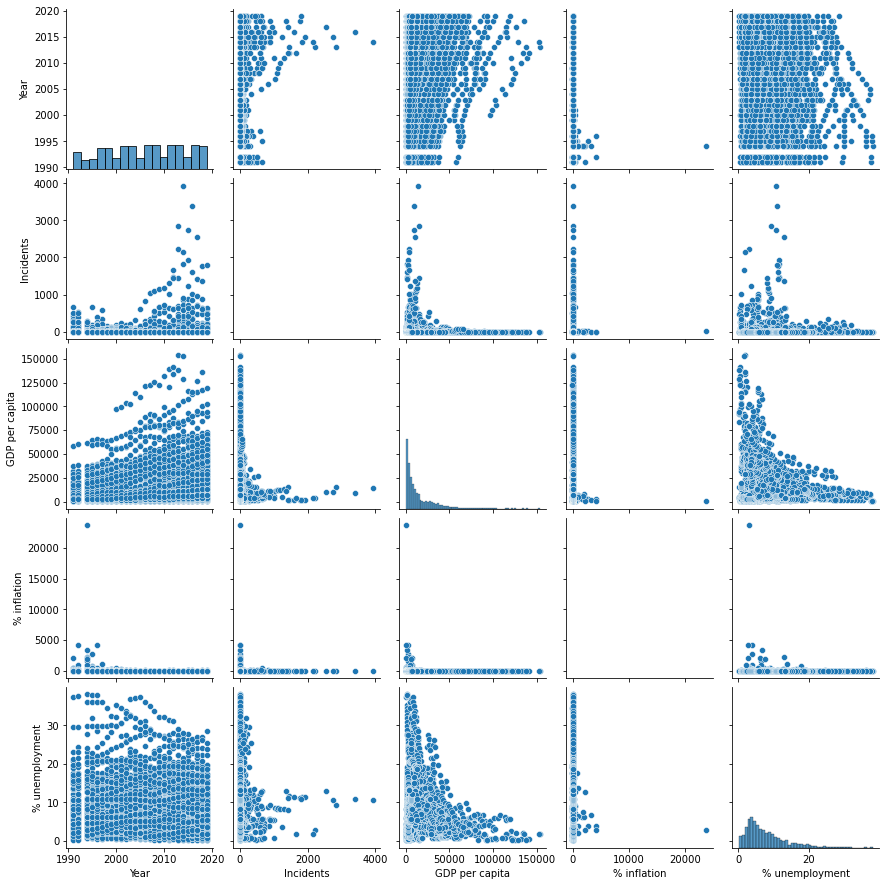

In [78]:
# Create pair plot 
g=sns.pairplot(merged)

##### All of the year-country combinations with high numbers of terrorist attacks occured in years & countries with very low GDP per capita. There doesn't appear to be an obvious link between incidents and inflation or unemployment. In fact, the year-country combinations with the highest inflation had low attacks and the highest number of attacks occured during times of low inflation. There is also an extreme inflation outlier that needs to be dealt with.

In [79]:
# Find value of inflation outlier
merged['% inflation'].max()

23773.13177

In [80]:
# Remove inflation outlier value
merged=merged.loc[merged['% inflation'] != 23773.13177]
merged['% inflation'].max()

4145.105982

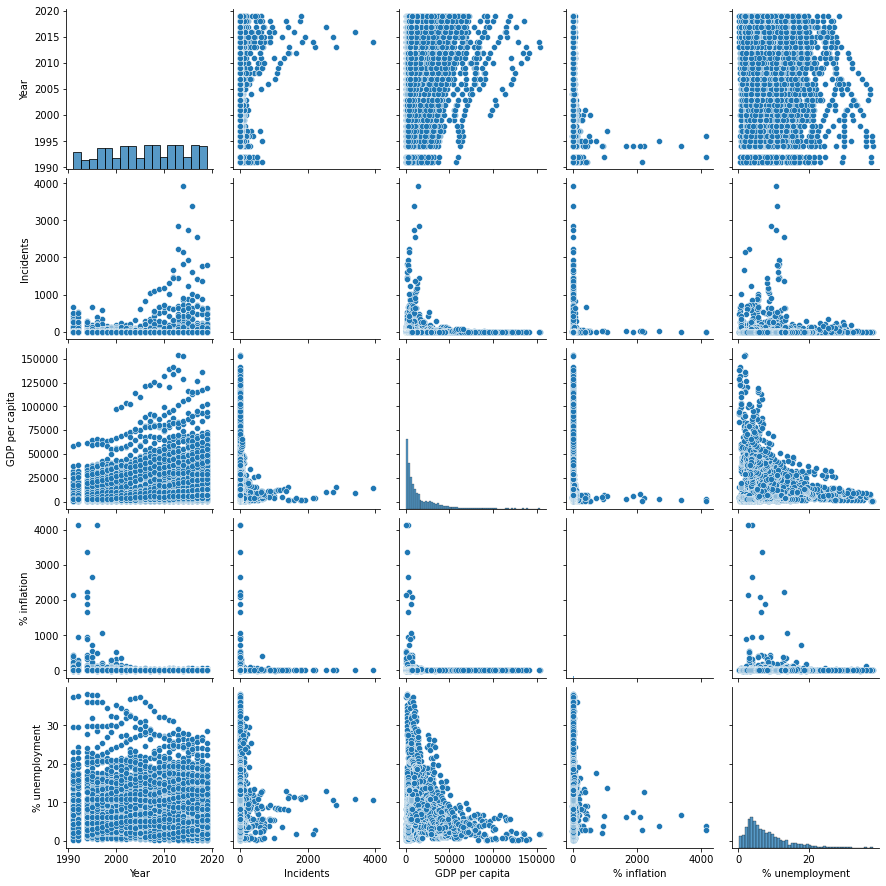

In [81]:
# Re-run pair plot
g=sns.pairplot(merged)

### 5.2 Correlation matrix heatmap

In [82]:
# Create correlation matrix
merged.corr()

,Year,Incidents,GDP per capita,% inflation,% unemployment
Year,1.000000,0.091788,0.240925,-0.118988,-0.031161
Incidents,0.091788,1.000000,-0.062352,-0.005069,0.004839
GDP per capita,0.240925,-0.062352,1.000000,-0.061958,-0.121279
% inflation,-0.118988,-0.005069,-0.061958,1.000000,-0.013598
% unemployment,-0.031161,0.004839,-0.121279,-0.013598,1.000000


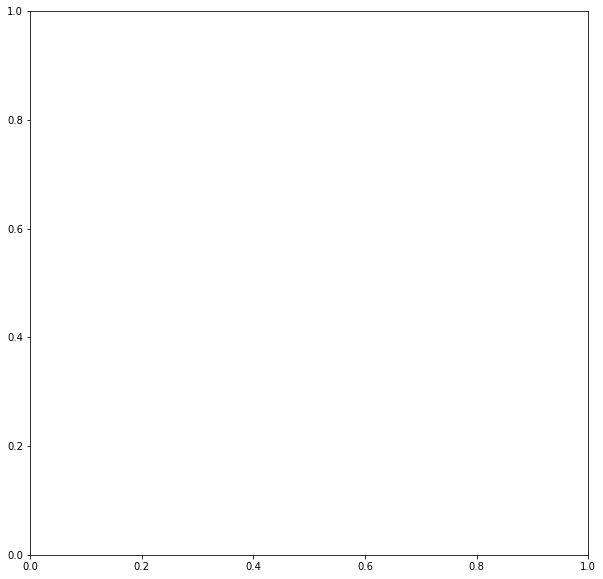

In [83]:
# Create subplot
f,ax = plt.subplots(figsize=(10,10))

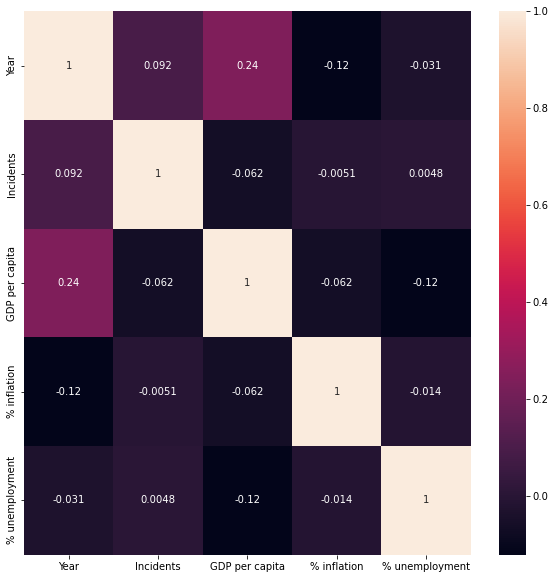

In [84]:
# Create & display correlation heatmap
corr = sns.heatmap(merged.corr(), annot = True, ax = ax)
corr.figure

##### No strong correlation between incidents and any of the other metrics

# 6. Cluster data

### 6.1 Standardize data

In [85]:
# Drop all non-numerical columns and year, as I don't feel time should be factored into my categorizations--I'm interested in the other metrics
merged_std=merged.drop(['Country Name', 'Year'], axis=1)
merged_std

,Incidents,GDP per capita,% inflation,% unemployment
34,155,1023.051749,12.686269,11.52
35,283,1077.761540,6.784597,11.34
36,342,1228.703863,8.680571,11.18
37,414,1272.572975,26.418664,11.11
38,503,1519.692923,-6.811161,11.46
...,...,...,...,...
10402,0,5825.058640,0.724470,8.66
10403,0,6330.806285,1.304719,8.58
10404,0,6489.776786,1.749897,8.44
10405,0,6537.875205,4.197459,8.32


In [86]:
# Standardize data
scaler=StandardScaler()
merged_std=scaler.fit_transform(merged_std)
merged_std=pd.DataFrame(merged_std)
merged_std

,0,1,2,3
0,0.740450,-0.766153,-0.024420,0.591421
1,1.506524,-0.763233,-0.068162,0.562082
2,1.859636,-0.755177,-0.054110,0.536003
3,2.290553,-0.752835,0.077361,0.524593
4,2.823214,-0.739646,-0.168931,0.581641
...,...,...,...,...
4398,-0.187218,-0.509855,-0.113079,0.125253
4399,-0.187218,-0.482862,-0.108778,0.112214
4400,-0.187218,-0.474377,-0.105478,0.089394
4401,-0.187218,-0.471810,-0.087338,0.069835


In [87]:
# Rename columns
merged_std.columns=['Incidents', 'GDP per capita', '% inflation', '% unemployment']
merged_std

,Incidents,GDP per capita,% inflation,% unemployment
0,0.740450,-0.766153,-0.024420,0.591421
1,1.506524,-0.763233,-0.068162,0.562082
2,1.859636,-0.755177,-0.054110,0.536003
3,2.290553,-0.752835,0.077361,0.524593
4,2.823214,-0.739646,-0.168931,0.581641
...,...,...,...,...
4398,-0.187218,-0.509855,-0.113079,0.125253
4399,-0.187218,-0.482862,-0.108778,0.112214
4400,-0.187218,-0.474377,-0.105478,0.089394
4401,-0.187218,-0.471810,-0.087338,0.069835


### 6.2 Elbow technique

In [88]:
# Set range of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [89]:
# List rates of variation for different numbers of clusters
score=[kmeans[i].fit(merged_std).score(merged_std) for i in range(len(kmeans))]
score

[-17612.0,
 -14036.454582720891,
 -10972.914368557844,
 -8099.893858805273,
 -5354.7907909918395,
 -4549.8954298552435,
 -3750.8717214165963,
 -3067.9728023151265,
 -2699.208906156304]

Text(0.5, 1.0, 'Elbow Curve')

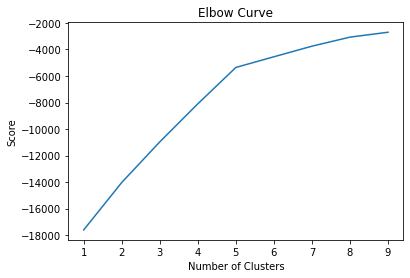

In [90]:
# Plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

##### This is a bit subjective, but I feel as if 5 clusters is the point at which the line starts to level off.

### 6.3 k-means algorithm

In [91]:
# Create k-means object and fit to data
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(merged_std)

KMeans(n_clusters=5)

In [92]:
# Add "clusters" column to original dataframe
merged['clusters'] = kmeans.fit_predict(merged_std)
merged

C:\Users\Errol\AppData\Local\Temp/ipykernel_19260/333302139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['clusters'] = kmeans.fit_predict(merged_std)


,Year,Country Name,Incidents,GDP per capita,% inflation,% unemployment,clusters
34,2005,Afghanistan,155,1023.051749,12.686269,11.52,2
35,2006,Afghanistan,283,1077.761540,6.784597,11.34,2
36,2007,Afghanistan,342,1228.703863,8.680571,11.18,2
37,2008,Afghanistan,414,1272.572975,26.418664,11.11,2
38,2009,Afghanistan,503,1519.692923,-6.811161,11.46,2
...,...,...,...,...,...,...,...
10402,2015,Samoa,0,5825.058640,0.724470,8.66,2
10403,2016,Samoa,0,6330.806285,1.304719,8.58,2
10404,2017,Samoa,0,6489.776786,1.749897,8.44,2
10405,2018,Samoa,0,6537.875205,4.197459,8.32,2


In [93]:
# Tally up entries in each cluster category
merged['clusters'].value_counts()

2    2647
0     895
1     819
4      33
3       9
Name: clusters, dtype: int64

### 6.4 Visualize clusters

In [94]:
# Make graphs display automatically
%matplotlib inline

Text(0, 0.5, 'GDP per capita')

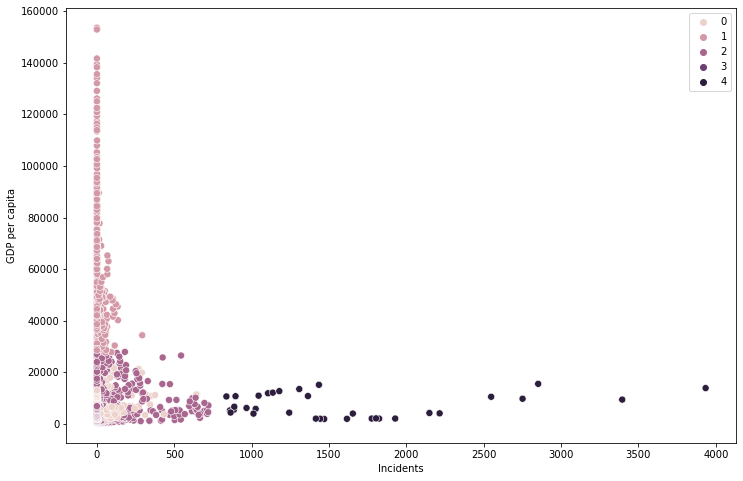

In [95]:
# Plot the clusters for incidents vs GDP per capita
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged['Incidents'], y=merged['GDP per capita'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Incidents')
plt.ylabel('GDP per capita')

Text(0, 0.5, '% inflation')

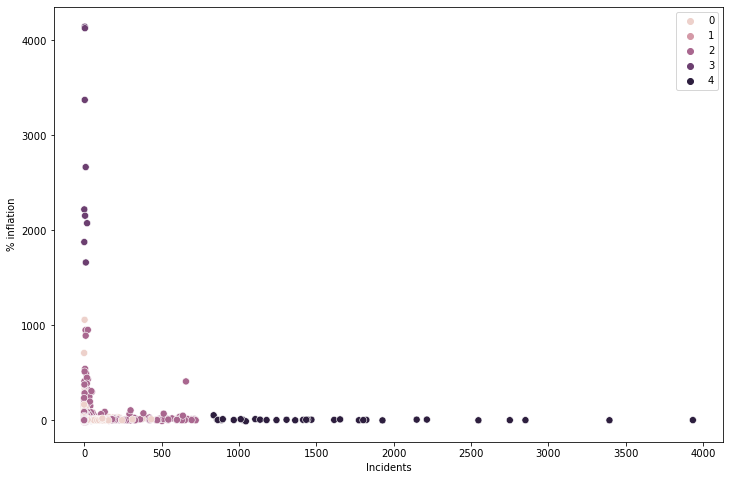

In [96]:
# Plot the clusters for incidents vs % inflation
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged['Incidents'], y=merged['% inflation'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Incidents')
plt.ylabel('% inflation')

Text(0, 0.5, '% unemployment')

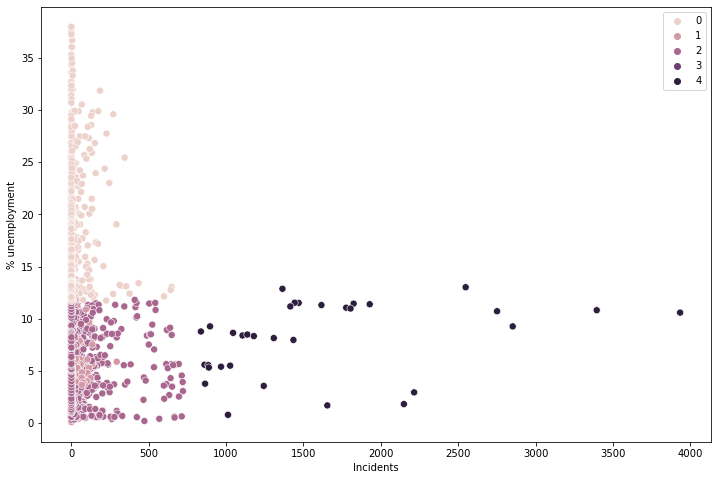

In [97]:
# Plot the clusters for incidents vs % unemployment
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged['Incidents'], y=merged['% unemployment'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Incidents')
plt.ylabel('% unemployment')

Text(0, 0.5, '% inflation')

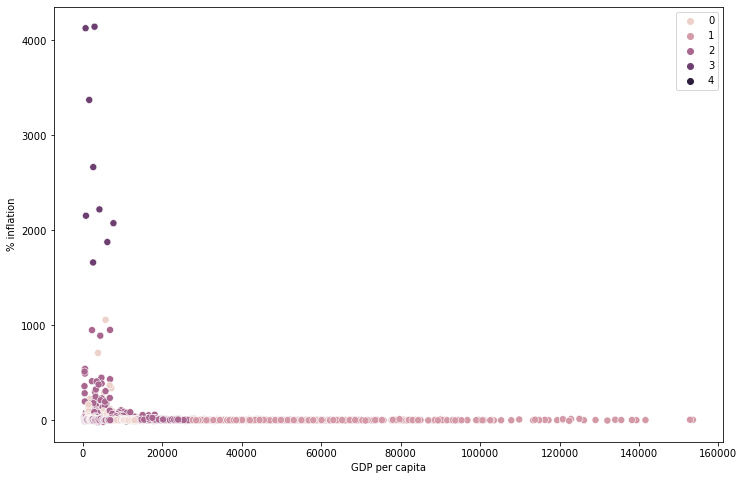

In [98]:
# Plot the clusters for GDP per capita vs % inflation
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged['GDP per capita'], y=merged['% inflation'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('GDP per capita')
plt.ylabel('% inflation')

Text(0, 0.5, '% unemployment')

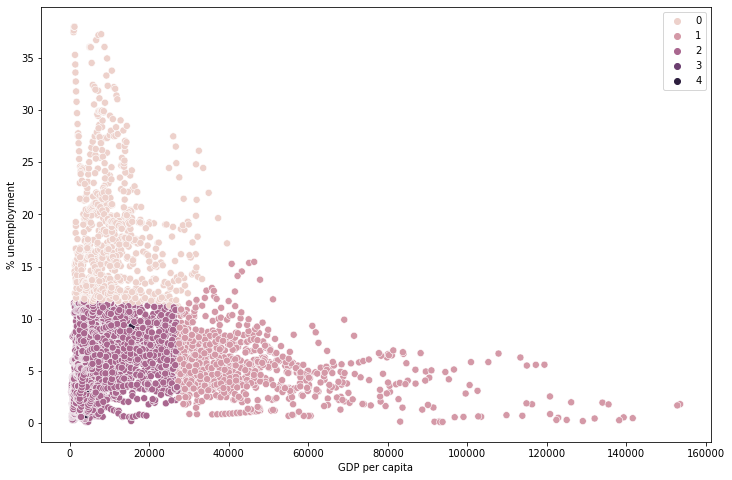

In [99]:
# Plot the clusters for GDP per capita vs % unemployment
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged['GDP per capita'], y=merged['% unemployment'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('GDP per capita')
plt.ylabel('% unemployment')

Text(0, 0.5, '% unemployment')

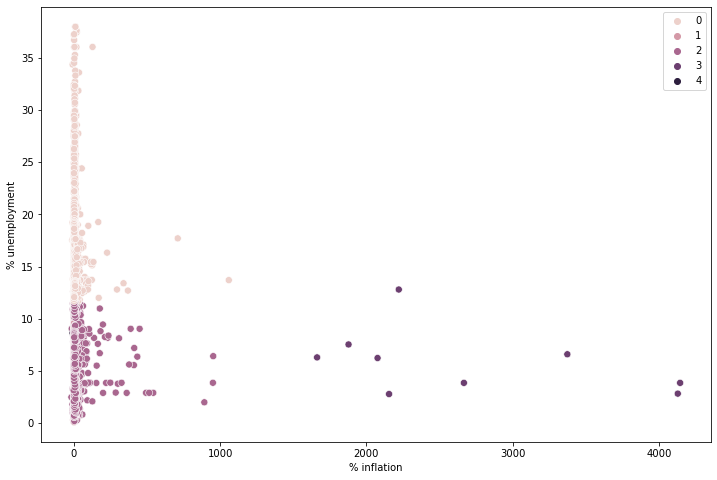

In [100]:
# Plot the clusters for % inflation vs % unemployment
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged['% inflation'], y=merged['% unemployment'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('% inflation')
plt.ylabel('% unemployment')

##### Clusters can be roughly described as follows:
0 - High unemployment

1 - High GDP per capita

2 - Low values in all metrics

3 - Hyperinflation

4 - High attacks

These values of "high" and "low" are relative, of course. An inflation rate of 1000% would be considered obscenely high by most people, but compared to some of these other values it is quite low.

### 6.5 Calculate statistics

In [101]:
# Rename clusters for simplicity
merged.loc[merged['clusters'] == 0, 'cluster_desc'] = 'High unemployment'
merged.loc[merged['clusters'] == 1, 'cluster_desc'] = 'High GDP per capita'
merged.loc[merged['clusters'] == 2, 'cluster_desc'] = 'Low values in all metrics'
merged.loc[merged['clusters'] == 3, 'cluster_desc'] = 'Hyperinflation'
merged.loc[merged['clusters'] == 4, 'cluster_desc'] = 'High attacks'

C:\Users\Errol\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Errol\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [102]:
# Calculate statistics
merged.groupby('cluster_desc').agg({'Incidents':['min', 'mean', 'median','max'], 
                          'GDP per capita':['min', 'mean', 'median','max'],
                          '% inflation':['min', 'mean', 'median','max'],
                        '% unemployment':['min', 'mean', 'median','max']})

Incidents                            GDP per capita  \
                                min         mean  median   max            min   
cluster_desc                                                                    
High GDP per capita               0     6.892552     0.0   293   27141.919330   
High attacks                    837  1600.757576  1415.0  3934    1914.774228   
High unemployment                 0    16.779888     1.0   647     877.894906   
Hyperinflation                    1     6.777778     5.0    19     708.833512   
Low values in all metrics         0    24.247450     1.0   721     346.362657   

                                                                      \
                                   mean        median            max   
cluster_desc                                                           
High GDP per capita        46892.516712  40361.096390  153563.911000   
High attacks                7230.243160   5839.864817   15535.345980   
High unemployment          10207.096314   8705.843170   39528.925390   
Hyperinflation              3274.805446   2649.361121    7722.008958   
Low values in all metrics   7517.875530   4575.130990   27913.818720   

                           % inflation                                         \
                                   min         mean       median          max   
cluster_desc                                                                    
High GDP per capita          -4.863278     2.043127     1.799828    16.332464   
High attacks                -10.067493     5.843543     4.673996    53.230963   
High unemployment           -11.686113    12.614430     4.509237  1058.373559   
Hyperinflation             1662.215949  2700.601779  2221.016570  4145.105982   
Low values in all metrics   -18.108630    12.430350     5.305601   951.962053   

                          % unemployment                           
                                     min       mean median    max  
cluster_desc                                                       
High GDP per capita                 0.11   5.308816   5.00  15.45  
High attacks                        0.80   8.115455   8.65  13.02  
High unemployment                  11.13  17.704771  16.22  37.97  
Hyperinflation                      2.79   5.868889   6.24  12.80  
Low values in all metrics           0.13   5.376728   4.77  11.81

# 7. Export data

In [103]:
# Export cleaned & wrangled terrorism dataset for Tableau
terror.to_csv(os.path.join(path, '02 Data','Prepared Data', 'global_terrorism.csv'))

In [104]:
# Export trimmed merged dataset for choropleth maps in Tableau
merged_map.to_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_map.csv'))

In [105]:
# Export final merged dataset with all economic indicators
merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'final_merged.csv'))